<a href="https://colab.research.google.com/github/LucaFedericoMarty/T.E_Netflix/blob/main/TE_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTACION DE LIBRERIAS

## Instalaciones

In [207]:
!pip install cinemagoer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
from datetime import datetime
import imdb
import PIL.Image 
import urllib

## Filtracion de dataframe

Leo el archivo csv con la funcion de pandas *read_csv*

In [209]:
historial = pd.read_csv("NetflixHistory.csv")

Creo una funcion con la que, con un parametro (que posteriormente sera la columna *Device Type*) pido que me devuelva si ese dispositivo no esta en la lista. Por lo tanto, creo una **lista de bools**, que si estan en la lista son **False** (aquellos que quiero filtrar y sacar) y otros que son **True**  

In [210]:
def filtrar_disp (disp):
  return disp not in ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

Creo un nuevo `DataFrame`, al cual le asigno los valores del `DataFrame` que lei anteriormente. Sin embargo, le aplico la funcion **filtrar_disp** a la columna *Device Type*, y pido que de esa lista de booleanos solo devuelva aquellas filas que son True (los dispositivos de los que queremos los datos)

In [211]:
historial_nef = historial[historial["Device Type"].apply(filtrar_disp)]
historial_nef

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


#a)

Consigna: Contabilizar el dispositivo con el que más títulos se reprodujeron.

Del nuevo `DataFrame`, selecciono la colunmna *Device Type* y mediante un metodo de `pandas`, agarras cuantas veces se repite cada fila y de esos valores, seleccionas el mayor. 

In [212]:
historial_nef["Device Type"].value_counts().idxmax()

'Apple Apple TV 4 Apple TV'

#b)

Consigna: Encontrar la película con más ocurrencias y la película con mayor duración total.


## Filtrado de peliculos y tiempo en segundos

Creo una funcion, la cual recibe un tiempo en el siguiente formato **horas:minutos:segundos** y mi objetivo es transformar ese tiempo en segundos. Para dividir cada parte en un elemento de una lista, utilizo la funcion **split**, que separa el tiempo por sus **":"** , por lo que ya tengo el tiempo separado en una lista. Recorro esa lista, convirtiendo cada elemento a un int para luego pasarlo a otra lista. Finalmento, accedo a las horas, que son el primer elemento, y lo multiplico por 3600, los minutos por 60 y los segundos los dejo igual. Ese valor lo sumo y lo devuelvo. 

In [213]:
def hours_to_seconds(tiempo):
  tiempo_fin = []
  tiempo_int = tiempo.split(":",2)

  for i in range(len(tiempo_int)): 
    tiempo_fin.append(int(tiempo_int[i]))
  tiempo_en_segundos = tiempo_fin[0] * 3600 + tiempo_fin[1] * 60 + tiempo_fin[2]

  return tiempo_en_segundos

Creo un nuevo `Dataframe` de solo peliculas. Para hacer esto, selecciono de la columna Title todas aquellas filas que no contengan ni la palabra **"Capitulo"** ni **"Temporada"** (palabras propias de una serie).

In [214]:
wo_movies = historial_nef[(historial_nef.Title.str.contains('Capítulo') == False) & (historial_nef.Title.str.contains('Temporada') == False)]
wo_movies 

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
72,72,Chona,2022-08-09 23:15:51,00:00:04,Autoplayed: user action: None;,Better Call Saul: Season 3_hook_primary_16x9,HOOK,Apple Apple TV 4 Apple TV,00:00:05,00:00:05,AR (Argentina)
75,75,Chona,2022-08-06 19:16:34,00:00:05,Autoplayed: user action: None;,Batch 2 (Clip 2): Batch 2,HOOK,Safari MAC (Cadmium),00:00:05,00:00:05,AR (Argentina)
86,86,Chona,2022-08-05 02:40:19,00:01:07,Autoplayed: user action: None;,Batch 2 (Clip): Batch 2,HOOK,Apple Apple TV 4 Apple TV,00:01:07,00:01:07,AR (Argentina)
88,88,Chona,2022-08-05 01:21:38,00:03:42,NaN,Resumen: Stranger Things,RECAP,Apple Apple TV 4 Apple TV,00:03:42,00:03:42,AR (Argentina)
89,89,Chona,2022-07-16 22:28:48,01:40:03,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12868,12868,Chona,2015-01-20 00:49:39,01:29:21,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina)
12869,12869,Chona,2015-01-20 00:20:46,00:00:32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina)
12894,12894,Chona,2015-01-16 00:48:04,01:34:02,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina)
12895,12895,Chona,2015-01-16 00:30:53,00:00:01,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina)


Creo un nuevo `DataFrame`, con esta vez solo peliculas, sacando los trailers, hooks y recaps. Para hacer esto, de la columna *Supplemental Video Type*, selecciono todas aquellas filas que no contengan nada, puesto que las que contienen algo son justamente las trailers, hooks, recaps.

In [215]:
just_movies = wo_movies[pd.isna(wo_movies['Supplemental Video Type'])]
just_movies

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
89,89,Chona,2022-07-16 22:28:48,01:40:03,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina)
157,157,Chona,2022-03-29 01:35:31,00:38:51,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:49:05,01:49:05,AR (Argentina)
158,158,Chona,2022-03-28 22:04:54,01:11:34,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:11:35,Not latest view,AR (Argentina)
294,294,Chona,2021-12-29 18:15:16,02:02:52,NaN,El Hombre Araña 2,NaN,Apple Apple TV 4 Apple TV,02:02:53,02:02:53,AR (Argentina)
296,296,Chona,2021-12-28 03:21:55,01:56:15,NaN,El hombre araña,NaN,Apple Apple TV 4 Apple TV,01:55:55,01:55:55,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12868,12868,Chona,2015-01-20 00:49:39,01:29:21,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina)
12869,12869,Chona,2015-01-20 00:20:46,00:00:32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina)
12894,12894,Chona,2015-01-16 00:48:04,01:34:02,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina)
12895,12895,Chona,2015-01-16 00:30:53,00:00:01,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina)


Le aplico la funcion de pasar el tiempo a segundos a la columna de *Duration* del `DataFrame` de peliculas. 

In [216]:
just_movies["Duration"] = just_movies["Duration"].apply(hours_to_seconds)
just_movies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
89,89,Chona,2022-07-16 22:28:48,6003,NaN,Mr. Holmes,NaN,Apple Apple TV 4 Apple TV,01:39:52,01:39:52,AR (Argentina)
157,157,Chona,2022-03-29 01:35:31,2331,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:49:05,01:49:05,AR (Argentina)
158,158,Chona,2022-03-28 22:04:54,4294,NaN,Baby: El aprendiz del crimen,NaN,Apple Apple TV 4 Apple TV,01:11:35,Not latest view,AR (Argentina)
294,294,Chona,2021-12-29 18:15:16,7372,NaN,El Hombre Araña 2,NaN,Apple Apple TV 4 Apple TV,02:02:53,02:02:53,AR (Argentina)
296,296,Chona,2021-12-28 03:21:55,6975,NaN,El hombre araña,NaN,Apple Apple TV 4 Apple TV,01:55:55,01:55:55,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12868,12868,Chona,2015-01-20 00:49:39,5361,NaN,Flubber y el profesor chiflado,NaN,Apple TV 3 (revised),01:29:21,01:29:21,AR (Argentina)
12869,12869,Chona,2015-01-20 00:20:46,32,NaN,Toy Story: una historia de terror,NaN,Apple TV 3 (revised),00:21:39,00:21:39,AR (Argentina)
12894,12894,Chona,2015-01-16 00:48:04,5642,NaN,Pesos pesados,NaN,Apple TV 3 (revised),01:34:01,01:34:01,AR (Argentina)
12895,12895,Chona,2015-01-16 00:30:53,1,NaN,Pesos pesados,NaN,Apple TV 3 (revised),00:00:01,Not latest view,AR (Argentina)


## Pelicula con mayor numero de ocurrencias

Selecciono la columna de los titulos y cuento cuantas veces se repite cada titulo. Luego, selecciono el maximo valor de esos.  

In [217]:
just_movies["Title"].value_counts().idxmax()

'Star Wars: El Imperio contraataca'

## Pelicula con mayor duracion (Individual)

Agarro del `DataFrame` de peliculas, aquel valor maximo de duracion, para asignar este valor a una `variable`. Luego, para obtener el titulo y duracion de la pelicula mas vista, selecciono de las tablas de *Title* y *Duration* aquella fila que cumpla con la condicion de ser la pelicula con mayor duracion.  

In [218]:
max_dur = just_movies['Duration'].max()
just_movies[['Title', 'Duration']] [just_movies['Duration'] == max_dur]

,Title,Duration
8127,El club de la pelea,8411


## Pelicula con mayor duracion (En general)

Selecciono todos los titulos de pelicula una unica vez por cada uno, para luego guardar estos valores en una variable. 

In [219]:
movies = just_movies["Title"].unique()
movies

array(['Mr. Holmes', 'Baby: El aprendiz del crimen', 'El Hombre Araña 2',
       'El hombre araña', 'Los juegos de la resaca', 'Amnesia',
       'La lista de pendientes', 'Tu primera vez', 'Jobs',
       'Bo Burnham: Make Happy', 'Supercool', "Horsin' Around",
       'Ahora son trece', 'Diamantes en bruto',
       'Negocios fuera de control', 'Mente indomable',
       'Yo los declaro marido y... Larry', 'El gran truco',
       'Star Wars: El despertar de la fuerza', 'Django sin cadenas',
       'El gran pez', 'Shrek 2', '¿Quién *&$%! son los Miller?',
       'El Camino: Una película de Breaking Bad', 'el Padre de la Novia',
       'Son como niños 2', 'Sebastian Maniscalco: Quédate con hambre',
       'Black Mirror: Bandersnatch', 'Ace Ventura: Un loco en África',
       'Un amigo como tú', 'No me olvides', 'Definitivamente, tal vez',
       'A todos los chicos de los que me enamoré', 'La propuesta',
       'Vengadores: La era de Ultrón', '¿Cómo sobrevivir a mi ex?',
       'Iron Man 3'

Voy recorriendo el `array` de nombre de peliculas uno por uno, y por cada valor igual al de una fila de la columna de titulos, seleciono todos sus valores de **duración** y los sumo. Estos valores se almacenan en la variable duraciones. Posteriormente, creo una `serie` con los valores de estas duraciones. Despues, creo un `DataFrame`, en el cual tengo asociado el **título** de la pelicula con su respectivo valor de duracion total. Finalmente, selecciono tanto el **título** como la duración de aquella fila que cumpla con la condición de ser la pelicula con mayor duración.

In [220]:
duraciones = [sum(just_movies[just_movies["Title"] == movie]["Duration"]) for movie in movies]
dur = pd.Series(duraciones)
title_duration_movies = pd.DataFrame({"Title": movies, "Duration": dur})
max_dur = title_duration_movies['Duration'].max()
title_duration_movies[['Title', 'Duration']][title_duration_movies['Duration'] == max_dur]

,Title,Duration
38,Star Wars: El Imperio contraataca,29433


#c)

Consigna: Generar un TOP “N” de series vistas y graficar.

i) Por tiempo visto

ii)Por ocurrencias


## Filtrado de series y tiempo en segundos

Filtro del `DataFrame` padre aquellas filas que cumplan con la condicion de que en su valor de la columna *Title*, contengan **Capitulo**, lo que significaria que si es una `serie`. 

In [221]:
only_series = historial_nef[historial_nef.Title.str.contains('Capítulo')]
only_series

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Le aplico la funcion de convertir el tiempo a segundos a la columna de *Duration* de la tabla de series.

In [222]:
only_series["Duration"] = only_series["Duration"].apply(hours_to_seconds)
only_series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,174,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,1293,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,1288,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,1241,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,1280,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,249,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


## i)

Solicito todos los *titulos* de **series**

In [223]:
series = only_series['Title']
series

0        Community: Temporada 3: Teoría del caos correc...
1        Community: Temporada 3: Ecología competitiva (...
2        Community: Temporada 3: Geografía del conflict...
3        Community: Temporada 2: Intermediate Documenta...
4        Community: Temporada 3: El documental (Capítul...
                               ...                        
12992      Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23)
12993    Lost: Temporada 1: Nacida para correr (Capítul...
12994      Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23)
12995      Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23)
12996      Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23)
Name: Title, Length: 5875, dtype: object

Como todas las series comparten que su nombre es el nombre de la serie seguido de dos punto, la **temporada** y el **nombre** del capitulo podemos aislar el nombre convirtiendo a un `array` que contiene dos `strings`, lo previo a los dos puntos y lo posterior. Evaluamos el `array` en cero y guardamos ese valor. 

In [224]:
nombre_de_series = []
for serie in series:
  nombre = serie.split(":", 2)
  nombre_real = nombre[0]
  nombre_de_series.append(nombre_real)
nombre_de_series

['Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'Community',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The Good Place',
 'The

Cambio todos los **titulos** completos por el nombre de la serie nada mas, que es mas conveniente

In [225]:
only_series['Title'] = nombre_de_series
only_series 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,174,NaN,Community,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,1293,NaN,Community,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,1288,NaN,Community,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,1241,NaN,Community,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,1280,NaN,Community,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,249,NaN,Lost,NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,15,NaN,Lost,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,37,NaN,Lost,NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,18,NaN,Lost,NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Intento semifuncional

Selecciono todas las instancias en las que aparece una **serie** con el mismo nombre y sumo sus duraciones


In [226]:
duracion_ser = []
duraciones_ser = []
for nombre_ser in nombre_de_series:
  duracion_ser = only_series.loc[only_series['Title'] == nombre_ser, 'Duration']
  sum_serie = duracion_ser.sum()
  duraciones_ser.append(sum_serie) 
duraciones_ser_tot = np.array(duraciones_ser)
duraciones_real_ser = np.unique(duraciones_ser_tot)
duraciones_real_ser

array([     2,      4,      6,     20,     33,     55,     61,     87,
           92,     99,    112,    138,    148,    172,    174,    217,
          242,    258,    279,    349,    411,    739,    740,    854,
          924,    941,   1260,   1264,   1313,   1364,   1371,   2457,
         2582,   2614,   2684,   2701,   3008,   3128,   3197,   3214,
         3216,   3292,   3442,   3748,   3767,   3933,   4003,   4267,
         4393,   5288,   5772,   5969,   6136,   6470,   7018,   7125,
         7143,   8292,   8366,   9048,   9407,   9758,   9947,  10274,
        10281,  12220,  14873,  14875,  14881,  15114,  17524,  18305,
        18817,  19033,  21017,  25729,  37155,  37382,  39780,  41498,
        54814,  58145,  62309,  62363,  62509,  69969,  77795,  80413,
        85325,  91740,  93777,  94330, 101226, 112810, 115400, 117240,
       118221, 119497, 172715, 186678, 197134, 202188, 235533, 262502,
       306755, 485376, 530325, 637377, 690936, 807438, 816931])

Selecciono todos los **titulos** de las series una unica vez por cada uno, para luego guardar estos valores en una `variable`. 

In [227]:
shows = only_series["Title"].unique()
shows

array(['Community', 'The Good Place', 'Better Call Saul',
       'Stranger Things', 'Brooklyn Nine-Nine', 'Designated Survivor',
       'Casi feliz', 'La ley de los audaces', 'Marvel - Daredevil',
       'Atlanta', 'El código de la discordia', 'Archer',
       'Punto de inflexión', 'El juego del calamar', 'Los Simuladores',
       'Close Enough', 'Rick y Morty', 'How to Sell Drugs Online (Fast)',
       'Legion', 'Historia', 'El arte del espionaje', 'Cobra Kai',
       'Big Mouth', 'Narcos', 'BoJack Horseman', 'Friends',
       'The Promised Neverland', 'Juegos locales', 'Avatar',
       'Bill Gates bajo la lupa', 'Especial 20 años Fútbol de Primera',
       'Middleditch & Schwartz', 'Madam C. J. Walker', 'Élite',
       'Power Rangers Dino Thunder', 'The Inbetweeners', 'Nisman',
       'Star Wars Rebels', 'Easy', 'Peaky Blinders', 'Billions',
       'Master of None', 'Californication', 'Glee', '(Des)encanto',
       'El método Kominsky', 'The Umbrella Academy', 'Lucifer', 'Dark',
    

Voy recorriendo el `array` de nombre de **series** uno por uno, y por cada valor igual al de una `fila` de la **columna de titulos**, seleciono todos sus valores de duracion y los sumo. Estos valores se almacenan en la `variable` duraciones. Posteriormente, creo una **serie** con los valores de estas duraciones. Despues, creo un `DataFrame`, en el cual tengo asociado el **titulo** de la serie con su respectivo valor de duracion total. Finalmente, selecciono tanto el **titulo** como la duracion de aquella fila que cumpla con la condicion de ser la serie con mayor duracion.

In [228]:
duraciones = [sum(only_series[only_series["Title"] == show]["Duration"]) for show in shows]
dur = pd.Series(duraciones)
title_duration = pd.DataFrame({"Title": shows, "Duration": dur})
title_duration

,Title,Duration
0,Community,807438
1,The Good Place,77795
2,Better Call Saul,85325
3,Stranger Things,117240
4,Brooklyn Nine-Nine,306755
...,...,...
107,Supernatural,15114
108,Juegos mentales,3197
109,Dilbert,2701
110,Prison Break,2582


Con una variable **n**, la cual va a delimitar mi top de peliculas. Este top se ordena en orden numero descedente (de mayor a menor) en relacion a la columna de duracion. Despues, luego de ordenar esta peliculas, seleciono el numero de filas que me indique **n**.

In [229]:
n = 3
top_series = title_duration.sort_values(by = ['Duration'], ascending = False).iloc[:n]
top_series['Title']

84    Cómo conocí a tu madre
0                  Community
25                   Friends
Name: Title, dtype: object

## Grafico

Text(0, 0.5, 'Duracion(s)')

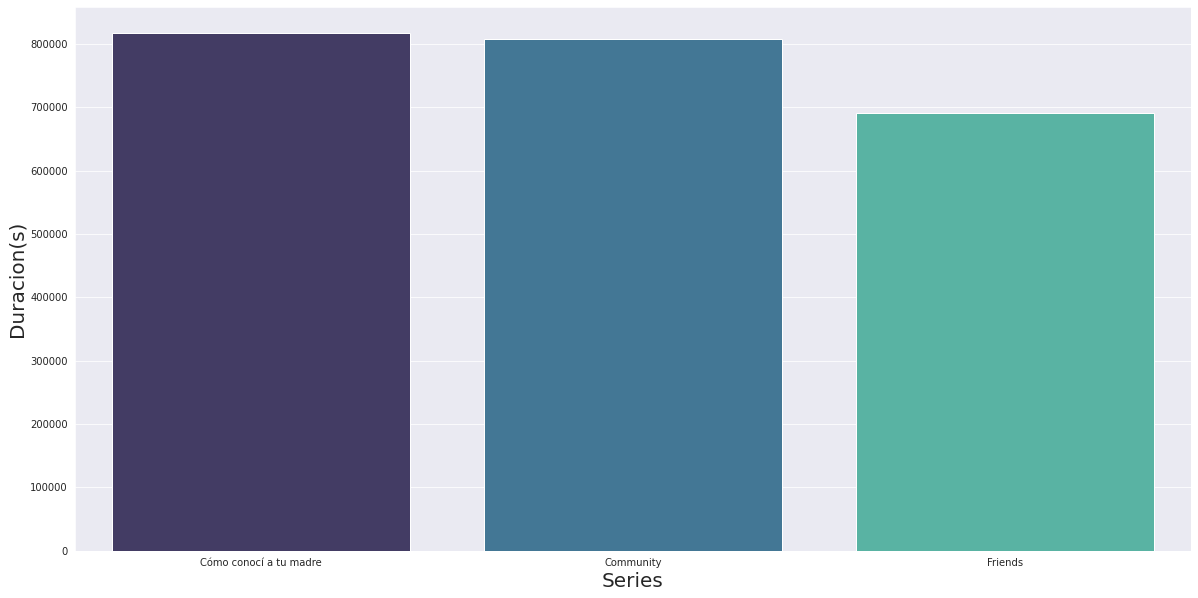

In [230]:
plt.figure(figsize = (20,10))
graph_top_duration = sns.barplot(x = 'Title', y = 'Duration', data = top_series, palette = 'mako')
plt.xlabel("Series", fontsize = 20)
plt.ylabel("Duracion(s)", fontsize = 20)

##ii)

Con una variable **n**, la cual va a delimitar mi top de peliculas. Este top se ordena en orden numero *descedente* (de mayor a menor) en relación al numero de ocurrencias de la serie. Este numero se calcula usando la funcion `value_counts()`. Despues, luego de ordenar esta peliculas, seleciono el numero de filas que me indique **n**.

In [231]:
n = 3
ocurrencias_series = only_series["Title"].value_counts()
top_viewed_series = ocurrencias_series.sort_values(ascending = False).iloc[:n]
top_viewed_series

Community                 870
Cómo conocí a tu madre    780
Friends                   604
Name: Title, dtype: int64

## Grafico

In [232]:
top_series = top_viewed_series.index

In [233]:
number_of_views = top_viewed_series.values

Text(0, 0.5, 'Numero de vistas')

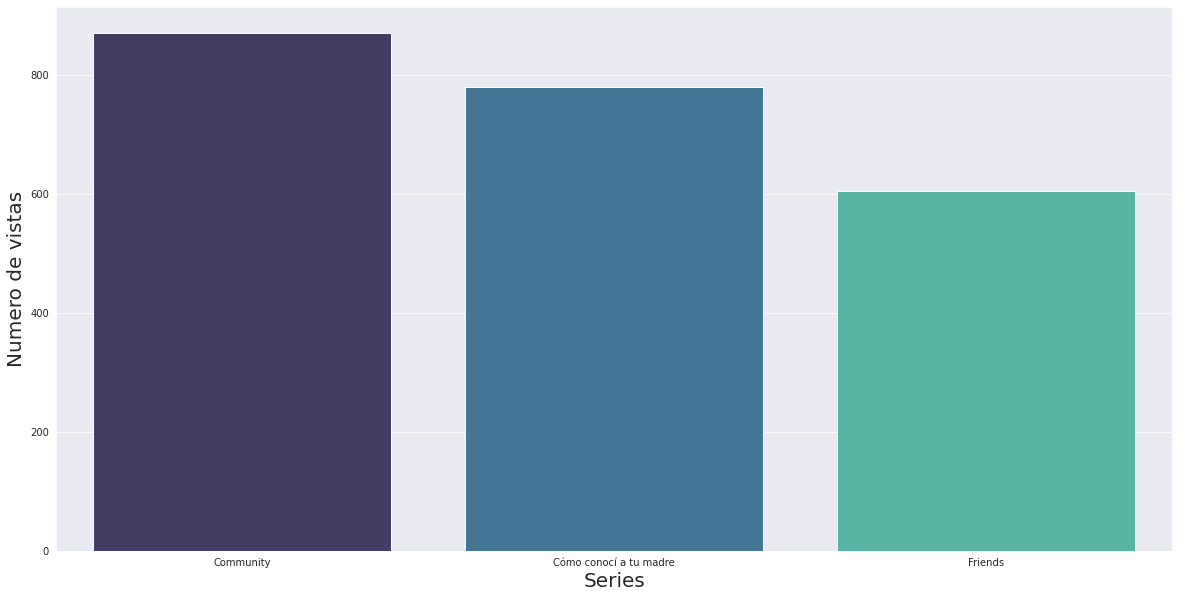

In [234]:
plt.figure(figsize = (20,10))
graph_top_viewed = sns.barplot(x = top_series, y = number_of_views, palette = 'mako')
plt.xlabel("Series", fontsize = 20)
plt.ylabel("Numero de vistas", fontsize = 20)

#d)

Consigna: Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.


In [235]:
test = historial[historial["Device Type"].apply(filtrar_disp)]
test

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Creo un objeto `datetime`, con el cual voy a poder obtener datos de **tiempo y fechas.**

In [236]:
dt = datetime.now()
dt

datetime.datetime(2022, 9, 10, 0, 43, 7, 356172)

Hago que del tiempo de la columna donda esta el tiempo, *Start Time*, se convierta en un objeto `datetime`. 

In [237]:
test['Start Time'] = pd.to_datetime(test['Start Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Creo una `lista de listas`, la cual va a alamecenar los titulos por cada hora y a su vez por cada dia. Es decir, guardaro cuantos titulos se vieron a las 4 los Lunes, cuantos a las 5 un Martes y asi sucesivamente. Por lo tanto, con un doble `for` voy asignando cada valor de los titulos vistos con su tiempo correspodiente.

In [238]:
titulos_dia_hora = [[y for y in range(24)] for x in range(7)]
for dia in range(7):
  for hora in range(24):
    titulos_dia_hora[dia][hora] = sum(test[(test['Start Time'].dt.dayofweek == dia) & (test['Start Time'].dt.hour == hora)]['Title'].value_counts().to_list())

## Grafico

Text(249.0, 0.5, 'Dias')

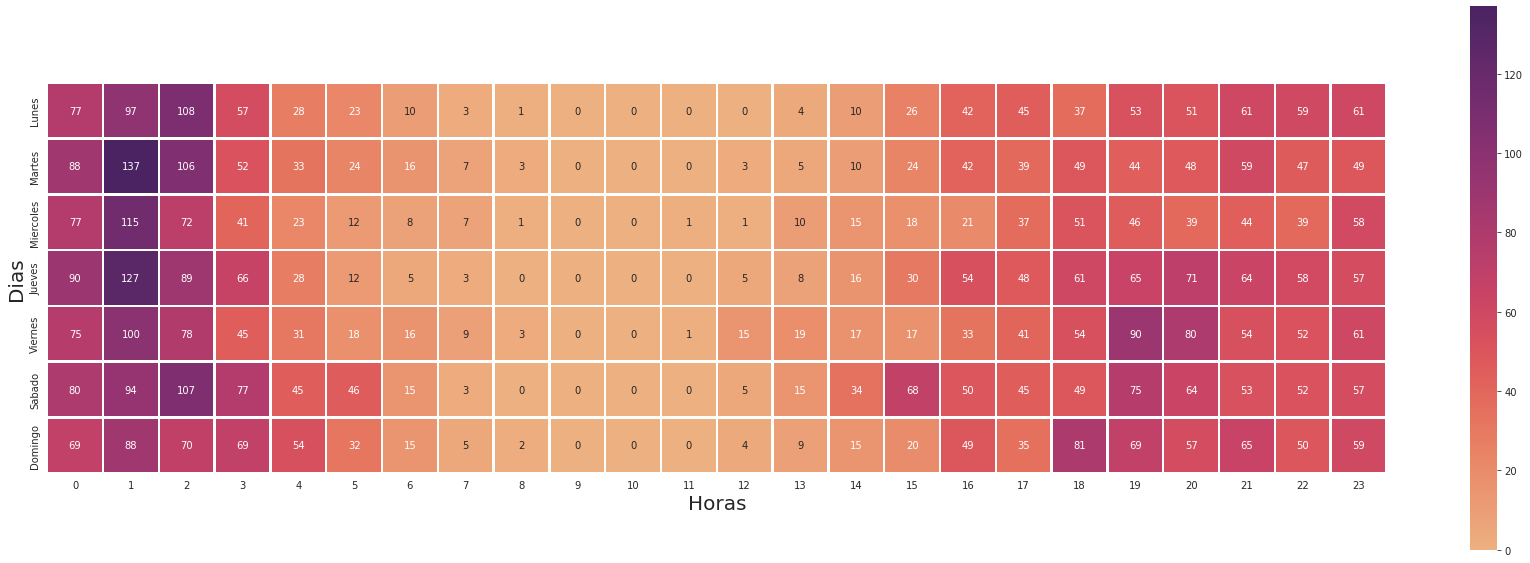

In [239]:
dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

plt.figure(figsize =(30,10))

sns.heatmap(titulos_dia_hora, annot = True, fmt = 'd', square = True, linewidths = 1.5, cbar = True, yticklabels = dias, cmap = 'flare')
plt.xlabel("Horas", fontsize = 20)
plt.ylabel("Dias", fontsize = 20)

#e)

Creo un nuevo `DataFrame` puesto que voy a modificar algunas columnas.

In [240]:
historial_anios = historial[historial["Device Type"].apply(filtrar_disp)]
historial_anios

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022-08-21 19:54:53,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022-08-21 19:33:17,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022-08-21 19:11:40,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022-08-21 18:50:27,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022-08-21 18:16:34,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015-01-08 19:21:21,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015-01-08 19:20:47,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015-01-08 19:18:32,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015-01-08 19:16:45,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Selecciono todas las **fechas**.

In [241]:
fechas = historial_anios['Start Time']
fechas

0        2022-08-21 19:54:53
1        2022-08-21 19:33:17
2        2022-08-21 19:11:40
3        2022-08-21 18:50:27
4        2022-08-21 18:16:34
                ...         
12992    2015-01-08 19:21:21
12993    2015-01-08 19:20:47
12994    2015-01-08 19:18:32
12995    2015-01-08 19:16:45
12996    2015-01-08 19:15:14
Name: Start Time, Length: 6291, dtype: object

De la fechas seleccionadas, agarro solo el **año**.

In [242]:
años = []
for fecha in fechas:
  año = fecha.split("-", 2)
  año_real = año[0]
  años.append(año_real)
años

['2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 

Le asigno todos los años a la columna de *Start Time*

In [243]:
historial_anios['Start Time'] = años
historial_anios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Chona,2022,00:02:54,NaN,Community: Temporada 3: Teoría del caos correc...,NaN,Apple Apple TV 4 Apple TV,00:02:55,00:02:55,AR (Argentina)
1,1,Chona,2022,00:21:33,NaN,Community: Temporada 3: Ecología competitiva (...,NaN,Apple Apple TV 4 Apple TV,00:21:33,00:21:33,AR (Argentina)
2,2,Chona,2022,00:21:28,NaN,Community: Temporada 3: Geografía del conflict...,NaN,Apple Apple TV 4 Apple TV,00:21:28,00:21:28,AR (Argentina)
3,3,Chona,2022,00:20:41,NaN,Community: Temporada 2: Intermediate Documenta...,NaN,Apple Apple TV 4 Apple TV,00:21:02,00:21:02,AR (Argentina)
4,4,Chona,2022,00:21:20,NaN,Community: Temporada 3: El documental (Capítul...,NaN,Apple Apple TV 4 Apple TV,00:21:21,00:21:21,AR (Argentina)
...,...,...,...,...,...,...,...,...,...,...,...
12992,12992,Chona,2015,00:04:09,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:04:40,Not latest view,AR (Argentina)
12993,12993,Chona,2015,00:00:15,NaN,Lost: Temporada 1: Nacida para correr (Capítul...,NaN,Apple TV 3 (revised),00:00:14,Not latest view,AR (Argentina)
12994,12994,Chona,2015,00:00:37,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:37,Not latest view,AR (Argentina)
12995,12995,Chona,2015,00:00:18,NaN,Lost: Temporada 1: Éxodo: Parte 1 (Capítulo 23),NaN,Apple TV 3 (revised),00:00:18,Not latest view,AR (Argentina)


Agarro los valores unicos de los años y los ordeno en orden *ascendente*, utilizando una funcion de `numpy` puesto que la lista de años es un `array`.

In [244]:
años_vistos = historial_anios['Start Time'].unique()
años_vistos_ordenados = np.sort(años_vistos)
años_vistos_ordenados

array(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

Reutilizando un *codigo* utilizado previamente, sumo el valor de cuantos titulos se vieron por año. Luego, creo una serie con esos valores, con lo que despues hago un `DataFrame` en el cual hay una columna con los años y la otra son los titulos vistos en ese mismo año.

In [245]:
titulos_por_anios = [sum(historial_anios[historial_anios["Start Time"] == año]["Title"].value_counts()) for año in años_vistos_ordenados]
titles_year = pd.Series(titulos_por_anios)
title_duration = pd.DataFrame({"Year": años_vistos_ordenados, "Number Titles": titles_year})
title_duration

,Year,Number Titles
0,2015,1191
1,2016,807
2,2017,795
3,2018,916
4,2019,550
5,2020,1016
6,2021,722
7,2022,294


## Graficos

Un grafico de barras **vertical** y uno **horizontal** hechos con seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cantidad de titulos')

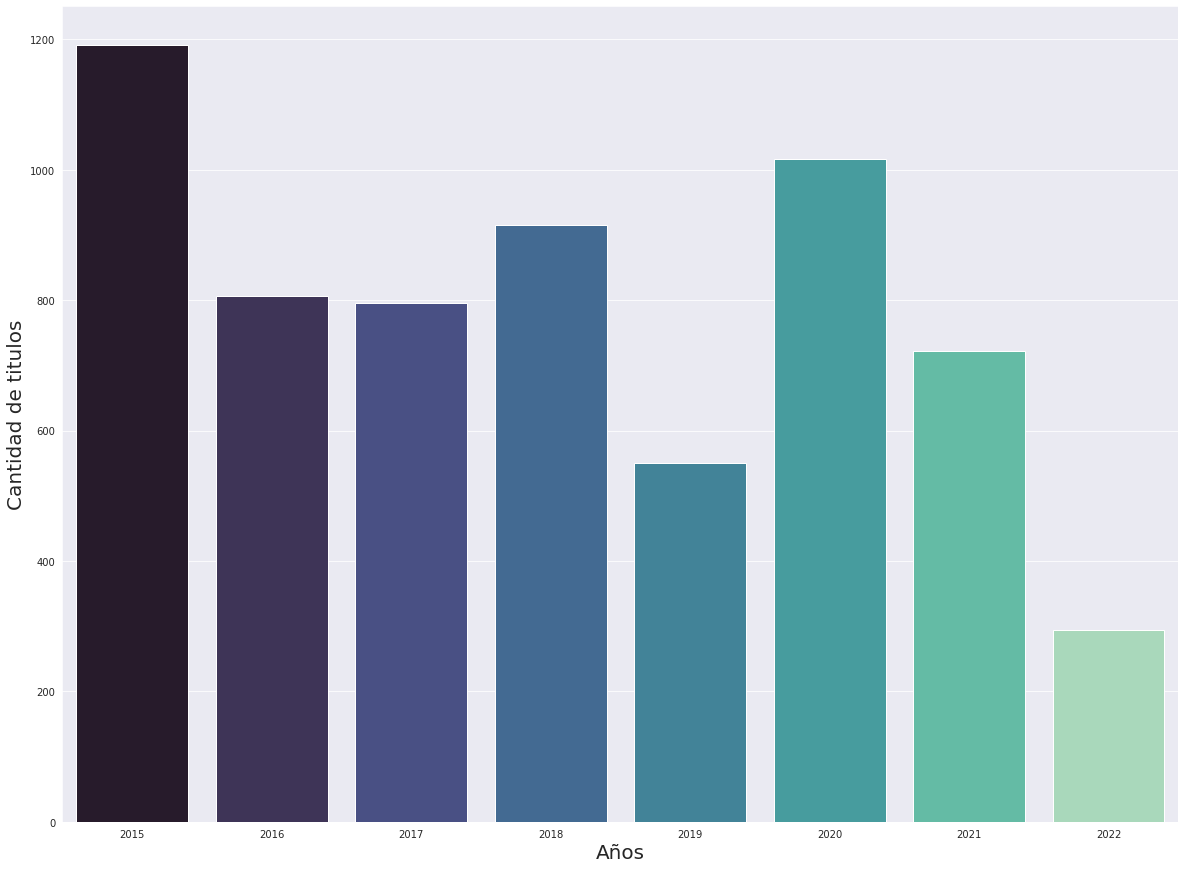

In [246]:
sns.set_style('darkgrid')

x = años_vistos_ordenados
y = titles_year

plt.figure(figsize = (20,15))
sns.barplot(x, y, palette = 'mako')
plt.xlabel("Años", fontsize = 20)
plt.ylabel("Cantidad de titulos", fontsize = 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Años')

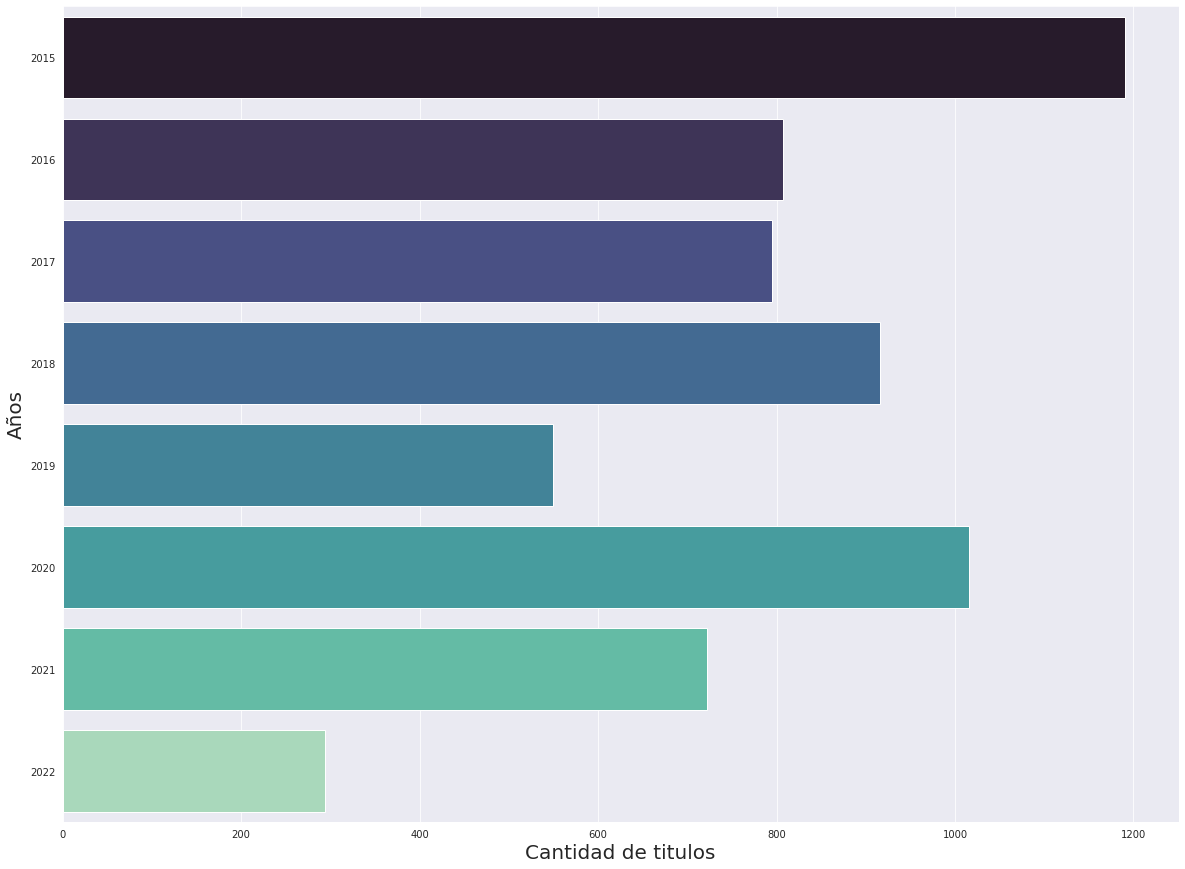

In [247]:
x = años_vistos_ordenados
y = titles_year

plt.figure(figsize = (20,15))
sns.barplot(y, x, palette = 'mako')
plt.xlabel("Cantidad de titulos", fontsize = 20)
plt.ylabel("Años", fontsize = 20)

#f)

Obtenemos la **duración** de cada pieza de contenido y le aplicamos la funcion que las pasa a **segundos**

In [248]:
historial_nef['Duration'] = historial_nef['Duration'].apply(hours_to_seconds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Sumamos la **duración** de todo lo visto y la dividimos por la **duración** de un día.

In [249]:
tiempo_en_segundos = historial_nef['Duration'].sum()
tiempo_en_dias = round(tiempo_en_segundos / 86400)
tiempo_en_dias

100

#Bonus

###1:

Separamos del `array`  de peliculas solo las que contienen *Star Wars:* en el nombre

In [250]:
sw_movies = just_movies[just_movies.Title.str.contains('Star Wars:')]
sw_movies

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
2647,2647,Chona,2020-01-01 17:57:33,1,NaN,Star Wars: El despertar de la fuerza,NaN,Apple Apple TV 4 Apple TV,02:07:11,Not latest view,AR (Argentina)
3122,3122,Chona,2019-10-27 21:31:01,7127,NaN,Star Wars: El despertar de la fuerza,NaN,Apple Apple TV 4 Apple TV,02:07:10,Not latest view,AR (Argentina)
4588,4588,Chona,2019-02-19 02:16:26,14,NaN,Star Wars: El despertar de la fuerza,NaN,Safari MAC (Cadmium),00:00:14,Not latest view,AR (Argentina)
4877,4877,Chona,2018-12-10 03:32:16,1345,NaN,Star Wars: El regreso del Jedi,NaN,Apple Apple TV 4 Apple TV,00:22:25,00:22:25,AR (Argentina)
4882,4882,Chona,2018-12-06 20:41:36,5504,NaN,Star Wars: El Imperio contraataca,NaN,Apple Apple TV 4 Apple TV,02:01:59,02:01:59,AR (Argentina)
4883,4883,Chona,2018-12-06 20:06:16,1815,NaN,Star Wars: El Imperio contraataca,NaN,Apple Apple TV 4 Apple TV,00:30:15,Not latest view,AR (Argentina)
4884,4884,Chona,2018-12-06 20:04:32,89,NaN,Star Wars: El Imperio contraataca,NaN,Apple Apple TV 4 Apple TV,00:00:10,Not latest view,AR (Argentina)
7027,7027,Chona,2017-12-22 03:32:56,7357,NaN,Star Wars: El Imperio contraataca,NaN,Apple Apple TV 4 Apple TV,02:01:58,Not latest view,AR (Argentina)
7028,7028,Chona,2017-12-22 03:32:48,1,NaN,Star Wars: El Imperio contraataca,NaN,Apple Apple TV 4 Apple TV,00:02:17,Not latest view,AR (Argentina)
7030,7030,Chona,2017-12-22 01:27:05,7337,NaN,Star Wars: Una nueva esperanza,NaN,Apple Apple TV 4 Apple TV,02:00:35,02:00:35,AR (Argentina)


In [251]:
nombres_sw_movie = sw_movies['Title'].unique()
nombres_sw_movie

array(['Star Wars: El despertar de la fuerza',
       'Star Wars: El regreso del Jedi',
       'Star Wars: El Imperio contraataca',
       'Star Wars: Una nueva esperanza',
       'Star Wars: La venganza de los Sith',
       'Star Wars: La amenaza fantasma',
       'Star Wars: El ataque de los clones'], dtype=object)

Intento fallido

In [252]:
#x = 0
#nombre_actual = nombres_sw_movie.iloc[x]
#duracion_sw = []
#duraciones_sw = []
#for nombre_sw in nombres_sw_movie:
  #if nombre_actual == nombre_sw:
   # duracion_sw = sw_movies.loc[sw_movies['Title'] == nombre_actual, 'Duration']
    #sum_sw_movie = duracion_sw.sum()
    #duraciones_sw.append(sum_sw_movie)
    #x += 1 
#duraciones_sw

Intento "viejo" pero funcional

Se obtine la **duracion** de todas las instancias de cada pelicula en particular y se ve cual es la mas alta

In [253]:
duracion_sw = []
duraciones_sw = []
for nombre_sw in nombres_sw_movie:
  duracion_sw = sw_movies.loc[sw_movies['Title'] == nombre_sw, 'Duration']
  sum_sw_movie = duracion_sw.sum()
  duraciones_sw.append(sum_sw_movie) 
duraciones_sw_movies = np.array(duraciones_sw)
duraciones_real_sw = np.unique(duraciones_sw_movies)
duraciones_real_sw.max()

29433

Intento "real"

In [254]:
duration = [sum(sw_movies[sw_movies["Title"] == title_sw]["Duration"]) for title_sw in nombres_sw_movie]
tiempo_sw = pd.Series(duration)
duration_sw = pd.DataFrame({"Movies": nombres_sw_movie, "Duracion": tiempo_sw})
duration_sw

,Movies,Duracion
0,Star Wars: El despertar de la fuerza,7142
1,Star Wars: El regreso del Jedi,9007
2,Star Wars: El Imperio contraataca,29433
3,Star Wars: Una nueva esperanza,20394
4,Star Wars: La venganza de los Sith,8040
5,Star Wars: La amenaza fantasma,7926
6,Star Wars: El ataque de los clones,6398


In [255]:
max_sw = duration_sw["Duracion"].max()
duration_sw[['Movies', 'Duracion']][duration_sw['Duracion'] == max_sw]

,Movies,Duracion
2,Star Wars: El Imperio contraataca,29433


##2:

Consigna: Utilizando la API de IMDb (u otra):

a) Mostrar el póster de las películas más vistas, y de las series.

b) Encontrar el género de series y el de películas más ocurrente.


## a)

Mediante esta `API`, busco la pelicula por su nombre y selecciono la correcta. Posteriormente, pido por request el **url** de su "cover" (poster), para luego mostrarlo con `PIL`

In [256]:
im = imdb.Cinemagoer()

In [257]:
top_pelicula = im.search_movie("Star Wars: El Imperio contraataca")[1]
top_serie = im.search_movie("Community")[0]

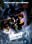

In [258]:
urllib.request.urlretrieve(top_pelicula['cover url'], "pelicula_sw.jpg")
poster_sw = PIL.Image.open("pelicula_sw.jpg")
poster_sw

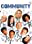

In [259]:
urllib.request.urlretrieve(top_serie['cover url'], "SerieCommunity_Poster.jpg")
poster_community = PIL.Image.open("SerieCommunity_Poster.jpg")
poster_community

## b)

Intento semifallido del B, puesto que solo busque el genero de la pelicula mas vista y de la serie mas vista, y el genero de pelicula esta incorrecto

In [260]:
id = top_pelicula.movieID
top_pelicula_test = im.get_movie(id)
genre = top_pelicula_test['genres']
genre

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [261]:
id = top_serie.movieID
top_serie_test = im.get_movie(id)
genre = top_serie_test['genres']
genre

['Comedy']

## 3:

Consigna: Encontrar la serie que más rápido se terminó de ver.